# Numerical experiment draft
## Linear regression case, with identity covariance matrix

In [105]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [81]:
# Generate data here

# set random seed
rng = np.random.default_rng(1)

# basic setting
var_epsilon = 1 # variance for noise in linear regression
d = 5 # d = 5,20,100,200
n = int(1e4) # sample size
eta = 1e0
alpha = 0.501 # step size eta_i = eta * i^{-alpha}
x_star = np.linspace(0,1,d) # optimal solution
x_0 = np.zeros(d) # initial guess

# mean and variance for generating a_i
# identity covariance matrix case
#
# linear regression model:
# b_i = x_star^\top a_i + \epsilon_i
mean_a = np.zeros(d)
cov_a = np.eye(d)
Asy_cov = np.eye(d) # asymptotic covariance matrix

In [82]:
# F for linear regression
#   F(x) = \mathbb{E} [1/2 (a^T x - b)^2]
#        = 1/2 (x-x_star)@cov_a@(x-x_star) + var_epsilon
def F_LR(x, cov_a, x_star, var_epsilon):
    return .5 * (x-x_star) @ cov_a @ (x-x_star) + var_epsilon


In [84]:
# run sgd
#
# update rule:
#   a_n: normal distribution (mean_a, cov_a)
#   epsilon_n: normal distribution (0,sigma_epsilon)
#   b_n = a_n^T x_star + epilon_n (assume it is generated instead of computing from a_n and x_star)
#   x_n = x_{n-1} - \eta_n a_n (a_n^T x_{n-1} - b_n)

x_prev = x_0
x_history = []
x_bar_history = []
a_n_history = []
b_n_history = []
F_true = var_epsilon
F_x_history = []
F_x_bar_history = []
lr_history = []

for iter_num in range(n):
    # sample data
    a_n = rng.multivariate_normal(mean_a, cov_a)
    epsilon_n = rng.normal(0, var_epsilon)
    b_n = a_n @ x_star + epsilon_n
    # update learning rate
    eta_n = eta * (1+iter_num)**(-alpha)
    # update rule
    x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
    x_prev = x_n
    # recording
    x_history.append(x_n)
    x_bar_history.append(np.mean(x_history, axis=0))
    a_n_history.append(a_n)
    b_n_history.append(b_n)
    F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
    F_x_bar_history.append(F_LR(x_bar_history[iter_num], cov_a, x_star, var_epsilon))
    lr_history.append(eta_n)
    # output every 1000 iter
    if iter_num%1000==999:
        print(f'Iter \t[{iter_num+1}/{n}]\t\t finished')
    # debug code


Iter 	[1000/10000]		 finished
Iter 	[2000/10000]		 finished
Iter 	[3000/10000]		 finished
Iter 	[4000/10000]		 finished
Iter 	[5000/10000]		 finished
Iter 	[6000/10000]		 finished
Iter 	[7000/10000]		 finished
Iter 	[8000/10000]		 finished
Iter 	[9000/10000]		 finished
Iter 	[10000/10000]		 finished
Iter 	[1000/10000]		 finished
Iter 	[2000/10000]		 finished
Iter 	[3000/10000]		 finished
Iter 	[4000/10000]		 finished
Iter 	[5000/10000]		 finished
Iter 	[6000/10000]		 finished
Iter 	[7000/10000]		 finished
Iter 	[8000/10000]		 finished
Iter 	[9000/10000]		 finished
Iter 	[10000/10000]		 finished


In [85]:
# bootstrap update
# R is number of bootstrap experiments
# history of r-th experiments is recorded in xxx_history[r*n:(r+1)*n]
R = 10
x_r_history = []
bootstrap_output_history = []
for r in range(1,R+1):
    rng_B = np.random.default_rng(r) # random generator for bootstrap experiment
    bootstrap_samples = rng_B.integers(0,n,n) # bootstrap_samples[i] is the index of data for i-th iteration
                                              # which is selected uniformly from given data
    # SGD on bootstrap samples
    x_prev = x_0
    for iter_num in range(n):
        # sample bootstrap data
        a_n = a_n_history[bootstrap_samples[iter_num]]
        b_n = b_n_history[bootstrap_samples[iter_num]]
        # update learning rate
        eta_n = eta * (1+iter_num)**(-alpha)
        # update rule
        x_n = x_prev - eta_n * (a_n @ x_prev - b_n) * a_n
        x_prev = x_n
        # recording
        x_history.append(x_n)
        x_bar_history.append(np.mean(x_history[n*r:], axis=0))
        a_n_history.append(a_n)
        b_n_history.append(b_n)
        F_x_history.append(F_LR(x_n, cov_a, x_star, var_epsilon))
        F_x_bar_history.append(F_LR(x_bar_history[n*r+iter_num], cov_a, x_star, var_epsilon))
        lr_history.append(eta_n)
        # output every 1000 iter
        if iter_num%1000==999:
            print(f'R: \t[{r}/{R}]\t Iter \t[{iter_num+1}/{n}]\t\t finished')
    bootstrap_output_history.append(x_bar_history[-1])


R: 	[1/10]	 Iter 	[1000/10000]		 finished
R: 	[1/10]	 Iter 	[2000/10000]		 finished
R: 	[1/10]	 Iter 	[3000/10000]		 finished
R: 	[1/10]	 Iter 	[4000/10000]		 finished
R: 	[1/10]	 Iter 	[5000/10000]		 finished
R: 	[1/10]	 Iter 	[6000/10000]		 finished
R: 	[1/10]	 Iter 	[7000/10000]		 finished
R: 	[1/10]	 Iter 	[8000/10000]		 finished
R: 	[1/10]	 Iter 	[9000/10000]		 finished
R: 	[1/10]	 Iter 	[10000/10000]		 finished
R: 	[2/10]	 Iter 	[1000/10000]		 finished
R: 	[2/10]	 Iter 	[2000/10000]		 finished
R: 	[2/10]	 Iter 	[3000/10000]		 finished
R: 	[2/10]	 Iter 	[4000/10000]		 finished
R: 	[2/10]	 Iter 	[5000/10000]		 finished
R: 	[2/10]	 Iter 	[6000/10000]		 finished
R: 	[2/10]	 Iter 	[7000/10000]		 finished
R: 	[2/10]	 Iter 	[8000/10000]		 finished
R: 	[2/10]	 Iter 	[9000/10000]		 finished
R: 	[2/10]	 Iter 	[10000/10000]		 finished
R: 	[3/10]	 Iter 	[1000/10000]		 finished
R: 	[3/10]	 Iter 	[2000/10000]		 finished
R: 	[3/10]	 Iter 	[3000/10000]		 finished
R: 	[3/10]	 Iter 	[4000/10000]		

In [86]:
# bootstrap true solution
# x_r is the optimal solution for r-th bootstrap problem
# which is obtainable
# It can be computed by
# x_r = inv(sum a_ir a_ir^T) * sum b_ir a_ir
x_r_history = []
for r in range(1,1+R):
    A = np.array(a_n_history[n*r:n*(r+1)]).T @ np.array(a_n_history[n*r:n*(r+1)])
    b = np.array(a_n_history[n*r:n*(r+1)]).T @ b_n_history[n*r:n*(r+1)]
    x_r = np.linalg.solve(A,b)
    x_r_history.append(x_r)


In [108]:
# Compute the length of confidence interval of each individual coefficient
Z = norm.ppf(0.975)
x_out = x_history[n-1]
for ii in range(d):
    sigma_hat = np.sqrt( np.sum(np.array(bootstrap_output_history)[:,ii] - np.array(x_r_history)[:,ii])**2 / R)
    Len = Z * sigma_hat
    print(Z*sigma_hat)
    if x_star[ii] >= x_out[ii] - Len or x_star[ii] <= x_out[ii] + Len:
        print('Covered')
    else:
        print("Not covered")

0.10620552386897293
Covered
0.13057940756220035
Covered
0.20089173418503803
Covered
0.17326532577147533
Covered
0.20492534040148297
Covered


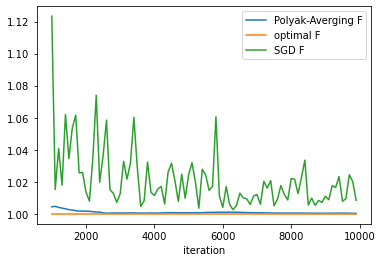

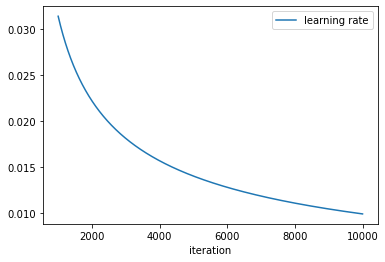

In [87]:
# have a look at the convergence
warmup_n = 1000
plot_every_n = 100
plt.plot(np.arange(warmup_n,n,plot_every_n), F_x_bar_history[warmup_n:n:plot_every_n])
plt.plot(np.arange(warmup_n,n,plot_every_n),F_true*np.ones(int((n-warmup_n) / plot_every_n)))
plt.plot(np.arange(warmup_n,n,plot_every_n),F_x_history[warmup_n:n:plot_every_n])
plt.legend(['Polyak-Averging F','optimal F','SGD F'])
plt.xlabel(f'iteration')
plt.show()

plt.plot(np.arange(warmup_n,n),lr_history[warmup_n:n])
plt.legend(['learning rate'])
plt.xlabel(f'iteration')
plt.show()

In [88]:
# debug block
for r in range(R+1):
    print(x_bar_history[(r+1)*n-1])
print(x_star)


[-0.01262694  0.24242389  0.50708942  0.73300955  0.99268637]
[-0.02527577  0.18757109  0.48214479  0.7417224   1.04757256]
[-0.02701731  0.240318    0.50012415  0.74005911  0.99744675]
[0.00623317 0.2325495  0.53879638 0.73265145 0.99667346]
[-0.00443516  0.24465528  0.50040356  0.74437255  1.00353196]
[-0.01747956  0.24296016  0.51462146  0.73457556  1.0059438 ]
[-0.02577814  0.24404967  0.49245826  0.73143289  0.98008854]
[-0.00549168  0.24366933  0.52880887  0.74295018  1.00210126]
[-0.18080215  0.53538501  0.87576991  1.05883548  1.26593897]
[-0.01044934  0.24009499  0.47678104  0.74328265  0.99293052]
[-0.01170445  0.24804143  0.50832249  0.72861675  0.9889374 ]
[0.   0.25 0.5  0.75 1.  ]


In [100]:
# debug block
print(np.array(bootstrap_output_history)[:,2])

[0.48214479 0.50012415 0.53879638 0.50040356 0.51462146 0.49245826
 0.52880887 0.87576991 0.47678104 0.50832249]
